<a href="https://colab.research.google.com/github/manavgupta1261/Machine-Learning/blob/main/2348529_Lab1_2_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

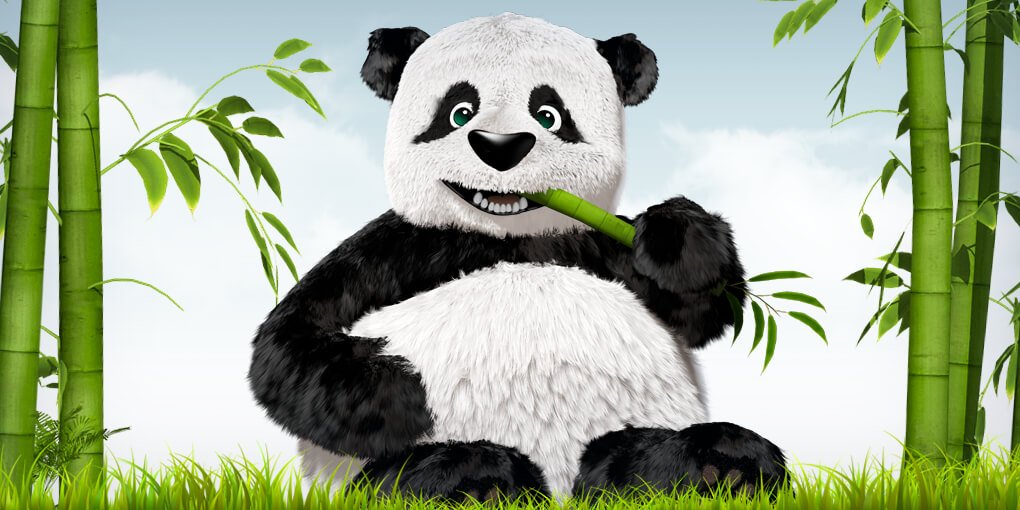

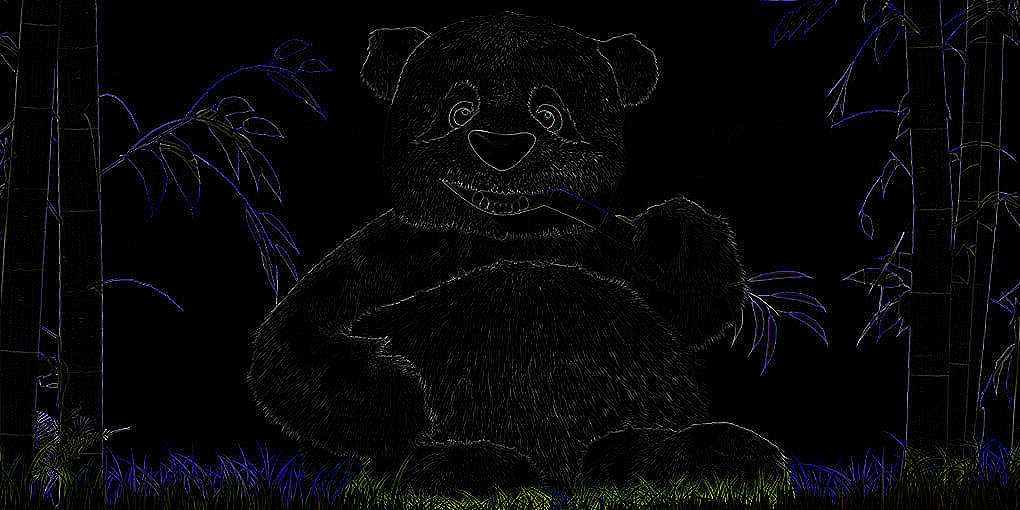

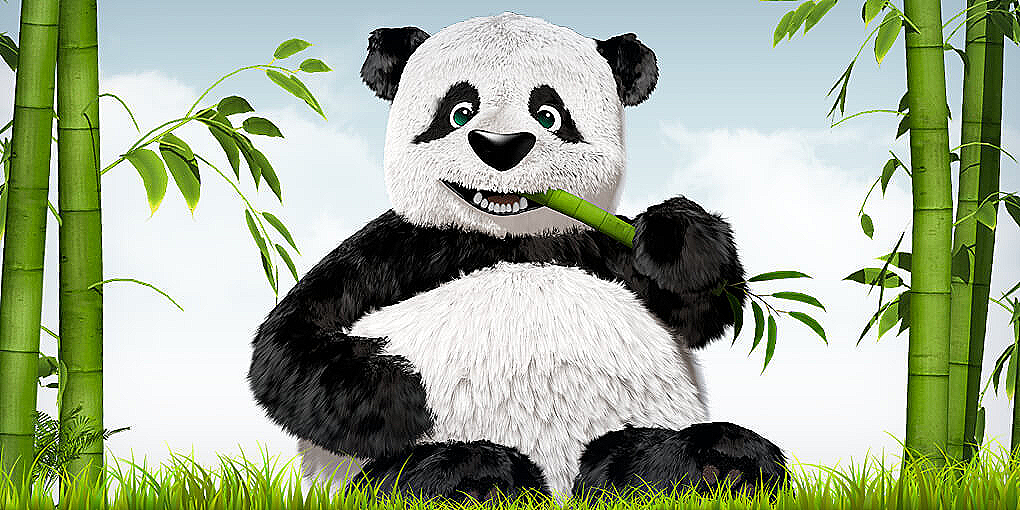

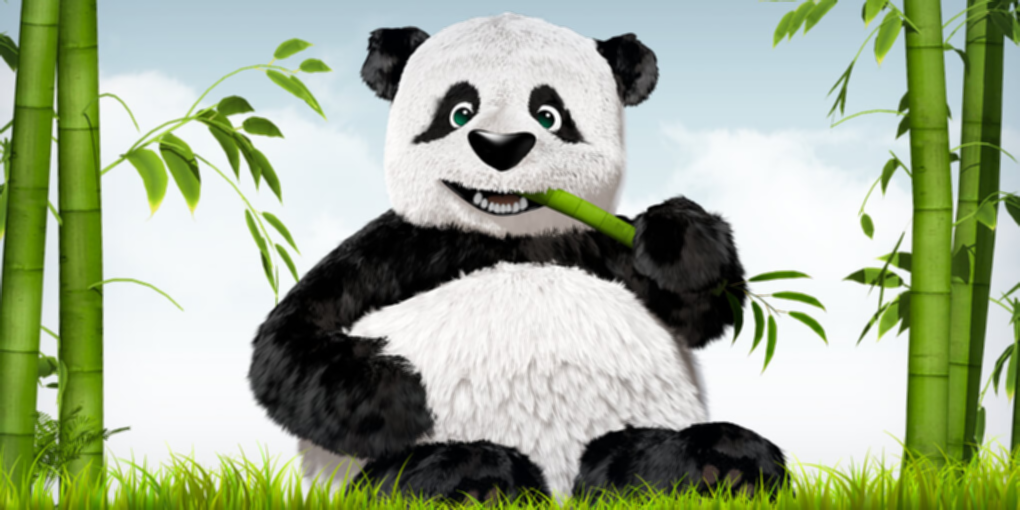

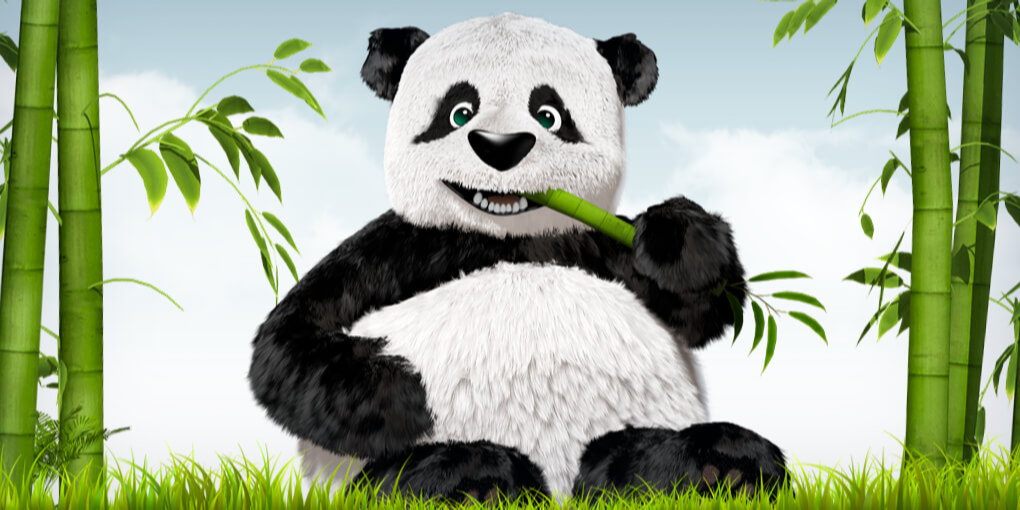

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/image.jpg')
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

edge_detection_kernel = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]])

sharpen_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

box_blur_kernel = np.ones((3, 3), np.float32) / 9

gaussian_blur_kernel = cv2.getGaussianKernel(3, 1)

identity_result = cv2.filter2D(image, -1, identity_kernel)
edge_detection_result = cv2.filter2D(image, -1, edge_detection_kernel)
sharpen_result = cv2.filter2D(image, -1, sharpen_kernel)
box_blur_result = cv2.filter2D(image, -1, box_blur_kernel)
gaussian_blur_result = cv2.filter2D(image, -1, gaussian_blur_kernel)

cv2_imshow(identity_result)
cv2_imshow(edge_detection_result)
cv2_imshow(sharpen_result)
cv2_imshow(box_blur_result)
cv2_imshow(gaussian_blur_result)


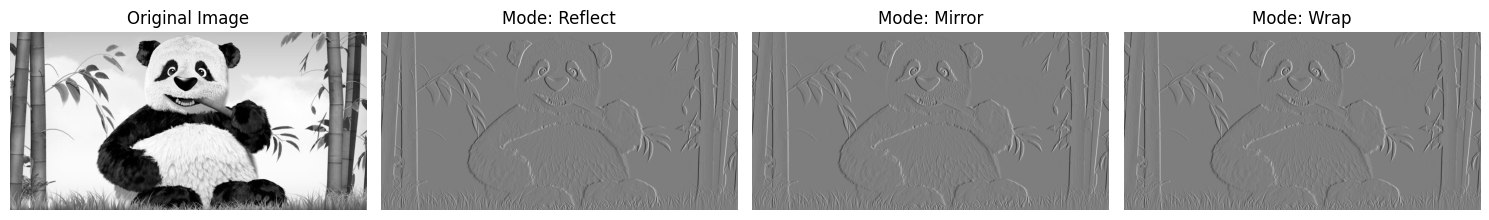

In [10]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from PIL import Image

image = np.array(Image.open('/content/image.jpg').convert('L'))

kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])
def reflect_pad(image, kernel_size):
    pad_width = kernel_size // 2
    return np.pad(image, pad_width, mode='reflect')

def mirror_pad(image, kernel_size):
    pad_width = kernel_size // 2
    return np.pad(image, pad_width, mode='symmetric')

def wrap_pad(image, kernel_size):
    pad_width = kernel_size // 2
    return np.pad(image, pad_width, mode='wrap')
padding_modes = {'Reflect': reflect_pad, 'Mirror': mirror_pad, 'Wrap': wrap_pad}
fig, axes = plt.subplots(1, len(padding_modes) + 1, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, (mode, pad_func) in enumerate(padding_modes.items(), start=1):
    padded_image = pad_func(image, kernel.shape[0])
    result = convolve2d(padded_image, kernel, mode='valid')
    axes[i].imshow(result, cmap='gray')
    axes[i].set_title(f'Mode: {mode}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()